Saturation vapor pressure at T_b (30°C): 4893.84 Pa
Saturation vapor pressure at T_inf (10°C): 1563.55 Pa


C:\Users\gtsch\AppData\Local\Temp\ipykernel_7492\359596219.py:32: RuntimeWarning: invalid value encountered in power
  delta_values = (delta_0**3 - term * x_values)**(1/3)


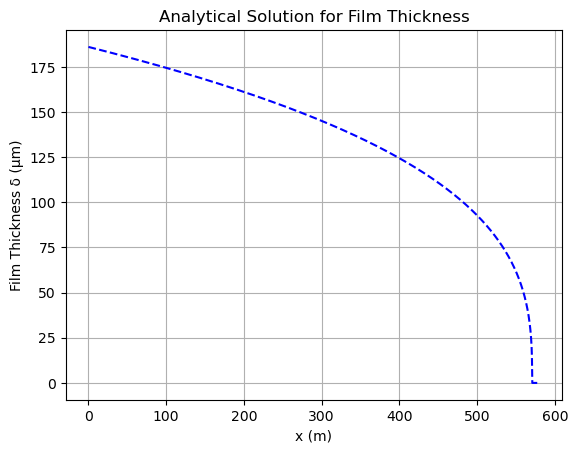

In [14]:
import numpy as np
import matplotlib.pyplot as plt

mu = 1.8e-3       # Dynamic viscosity (kg/(m·s))
rho = 1000        # Density (kg/m^3)
g = 9.81          # Gravity (m/s^2)
h_m = 0.00089       # Mass transfer coefficient (m/s)
R_v = 461.5       # Specific gas constant for water vapor (J/kg·K)
L_v = 2.26e6      # Latent heat of vaporization (J/kg)

T_b_C = 30       # Panel Temp (C)
T_inf_C = 10     # Ambient temperature (C) 
T_b = T_b_C + 273.15
T_inf = T_inf_C + 273.15

# Clausius-Clapeyron
def e_s(T):
    T0 = 373.15  # Reference temperature (K)
    P0 = 101325  # Reference pressure (Pa)
    return P0 * np.exp(L_v / R_v * (1/T0 - 1/T))

e_s_Tb = e_s(T_b)    
e_inf = e_s(T_inf)  
print(f"Saturation vapor pressure at T_b ({T_b_C}°C): {e_s_Tb:.2f} Pa")
print(f"Saturation vapor pressure at T_inf ({T_inf_C}°C): {e_inf:.2f} Pa")

# Analytical solution
x = 580  # Length in meters
x_values = np.linspace(0, x, 100000)
delta_0 = 0.000186  # Initial film thickness
term = (3 * mu * h_m / (rho**2 * g)) * (e_s_Tb / (R_v * T_b) - e_inf / (R_v * T_inf))
delta_values = (delta_0**3 - term * x_values)**(1/3)
delta_values = np.where(delta_values > 0, delta_values, 0) * 1e6  # Convert to microns

plt.plot(x_values, delta_values, linestyle="--", color="b")
plt.xlabel("x (m)")
plt.ylabel("Film Thickness δ (μm)")
plt.title("Analytical Solution for Film Thickness")
plt.grid()
plt.show()


In [15]:
term = (3 * mu * h_m / (rho**2 * g)) * (e_s_Tb / (R_v * T_b) - e_inf / (R_v * T_inf))
x_zero = delta_0**3 / term  

# Print the result
print(f"Film disappears at x = {x_zero:.2f} m")

Film disappears at x = 570.71 m


In [16]:
# water loss rate from Wang et. al.

h_film = 180e-6  # Film thickness in meters
v_film = 0.06  # Falling velocity in m/s
rho_water = 1000  # Density of water in kg/m^3
water_loss_rate = 0.000339  # Water loss rate kg/s

# Panel dimensions
width = 8  
height = 2 
area = width * height 




# Compute evaporation mass flux (J_s)
J_s = water_loss_rate / area  # kg/m^2·s

# Compute mass flow rate per unit width
m_dot_film = rho_water * v_film * h_film  # kg/m·s

# Compute evaporation distance
L_evaporation = m_dot_film / J_s  # meters

# Print result

print(f"Evaporation mass flux: {J_s:.6f} kg/m^2·s")
print(f"Evaporation distance for 8x2 panel: {L_evaporation:.2f} meters")

Evaporation mass flux: 0.000021 kg/m^2·s
Evaporation distance for 8x2 panel: 509.73 meters
